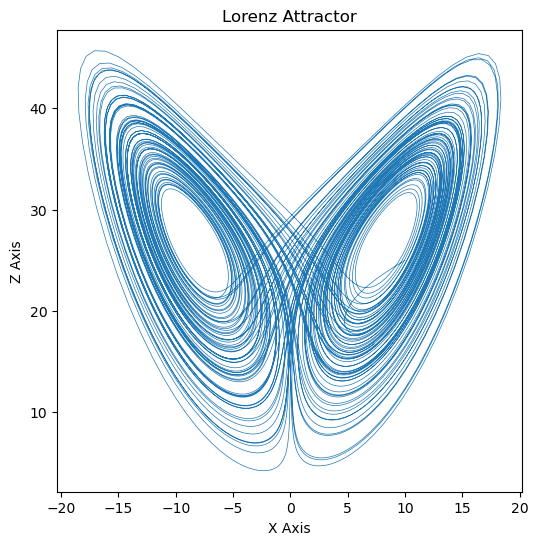

In [86]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 8/3, 28
initial_conditions = np.array([10, 0, 25])

# Lorenz system of equations
def lorenz_system(current_state, t):
    x, y, z = current_state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Time array for solution
dt = 0.01
step_count = 10000
t = np.arange(0, step_count*dt, dt)

# Solve for the trajectories
trajectory = odeint(lorenz_system, initial_conditions, t)

# Plotting the 2D projection of the Lorenz attractor in the X-Z plane
plt.figure(figsize=(6, 6))
plt.plot(trajectory[:, 0], trajectory[:, 2], lw=0.5)
plt.xlabel("X Axis")
plt.ylabel("Z Axis")
plt.title("Lorenz Attractor")
plt.show()

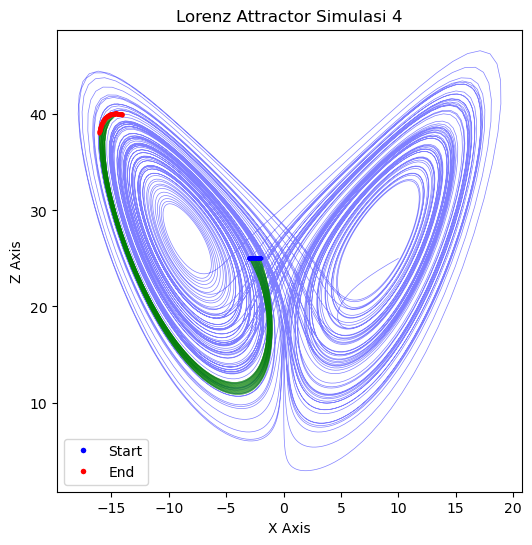

In [98]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lorenz system parameters
sigma, beta, rho = 10, 8/3, 28
dt = 0.01
num_steps = 10000

# Define the Lorenz system equations
def lorenz(X, t, sigma, beta, rho):
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Time vector for the full simulation
t_full = np.linspace(0, dt*num_steps, num_steps)

# Initial conditions for the full attractor
initial_conditions_full = np.array([10, 0, 25])

# Solve for the full Lorenz attractor trajectory
trajectory_full = odeint(lorenz, initial_conditions_full, t_full, args=(sigma, beta, rho))

# Time vector for finite simulation
t_finite = np.linspace(0, dt*60, 60)

# Create 100 initial conditions for x and integrate the Lorenz system for each
random_x_starts = np.linspace(-3, -2, 100)
finite_trajectories = []

for x0 in random_x_starts:
    initial_conditions = [x0, 0, 25]
    trajectory_finite = odeint(lorenz, initial_conditions, t_finite, args=(sigma, beta, rho))
    finite_trajectories.append(trajectory_finite)

# Plotting the Lorenz attractor with finite time trajectories
plt.figure(figsize=(6, 6))
plt.plot(trajectory_full[:, 0], trajectory_full[:, 2], color='blue', lw=0.5, alpha=0.5)

# Plot each finite time trajectory
for traj in finite_trajectories:
    plt.plot(traj[:, 0], traj[:, 2], color='green', lw=0.1)
    plt.plot(traj[0, 0], traj[0, 2], 'o', color='blue', markersize=2)
    plt.plot(traj[-1, 0], traj[-1, 2], 'o', color='red', markersize=2)

# Create custom legend items
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Start', markerfacecolor='blue', markersize=5),
    Line2D([0], [0], marker='o', color='w', label='End', markerfacecolor='red', markersize=5)
]

# Add legend to the plot with custom location
plt.legend(handles=legend_elements, loc='lower left')

plt.xlabel("X Axis")
plt.ylabel("Z Axis")
plt.title("Lorenz Attractor Simulasi 4")
plt.show()

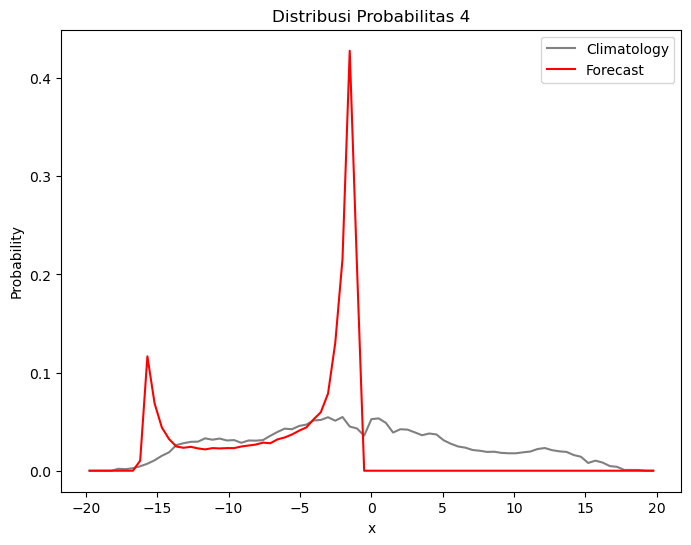

In [99]:
# Extract the x values from the full trajectory
x_full = trajectory_full[:, 0]

# Calculate the histogram of the full trajectory
hist_full, bins_full = np.histogram(x_full, bins=np.linspace(-20, 20, 80), density=True)

# We will use the middle of each bin for plotting
bin_centers_full = (bins_full[:-1] + bins_full[1:]) / 2

# Extract the x values from the finite trajectories
x_finite = np.concatenate([traj[:, 0] for traj in finite_trajectories])

# Calculate the histogram of the finite trajectories
hist_finite, bins_finite = np.histogram(x_finite, bins=np.linspace(-20, 20, 80), density=True)

# Use the middle of each bin for plotting
bin_centers_finite = (bins_finite[:-1] + bins_finite[1:]) / 2

# Now let's plot the probability distributions
plt.figure(figsize=(8, 6))
plt.plot(bin_centers_full, hist_full, label='Climatology', color='gray')
plt.plot(bin_centers_finite, hist_finite, label='Forecast', color='red')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Distribusi Probabilitas 4')
plt.legend()
plt.show()

In [100]:
# Calculate standard deviation, range, and peak probability for finite trajectories
std_finite = np.std(x_finite)
range_finite = max(x_finite) - min(x_finite)
peak_prob_finite = max(hist_finite)
peak_index_finite = np.argmax(hist_finite)
peak_x_finite = bin_centers_finite[peak_index_finite]

# Print the information
print("Finite Trajectories:")
print("Standard Deviation of x:", std_finite)
print("Range of x values:", range_finite)
print("Peak probability value:", peak_prob_finite, "at x =", peak_x_finite)

Finite Trajectories:
Standard Deviation of x: 5.066503910876749
Range of x values: 15.097005058771563
Peak probability value: 0.42791666666666744 at x = -1.5189873417721511


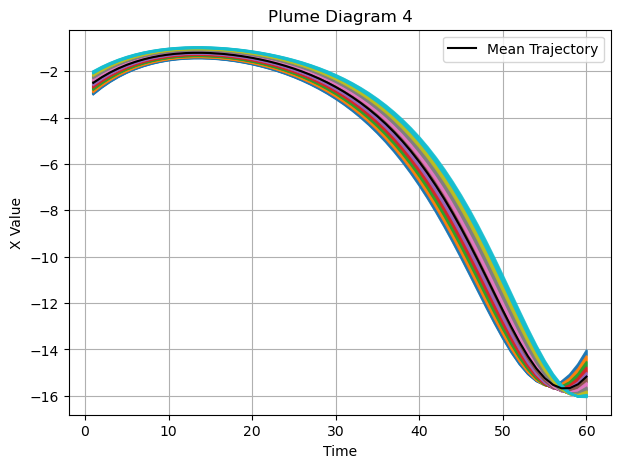

In [101]:
# Time vector for finite simulation
t_finite_60 = np.arange(1, 61)  # Create time steps from 1 to 60

# Now we will plot the trajectories and the mean trajectory up to time step 60
plt.figure(figsize=(7, 5))

# Generate a color map for ensemble trajectories
colors = plt.cm.tab10(np.linspace(0, 1, 100))

for i in range(100):
    plt.plot(t_finite_60, finite_trajectories[i][:,0], color=colors[i], alpha=0.7)  # Plot individual trajectories with different colors
plt.plot(t_finite_60, np.mean([traj[:,0] for traj in finite_trajectories], axis=0), color='black', label='Mean Trajectory')  # Plot the mean trajectory
plt.xlabel('Time')
plt.ylabel('X Value')
plt.title('Plume Diagram 4')
plt.legend()
plt.grid(True)
plt.show()